In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df=pd.read_csv('Graduate Dataset\Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.drop(columns=['Serial No.'],inplace=True)

In [6]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.shape

(500, 8)

In [8]:
X=df.iloc[:,:-1] #All rows, all columns except the last one
Y=df.iloc[:,-1]  ## All rows, the last column

In [9]:
X


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [10]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) #splitting data into test and train sets

In [13]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [14]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
304,313,106,2,2.5,2.0,8.43,0
340,312,107,3,3.0,3.0,8.46,1
47,339,119,5,4.5,4.0,9.70,0
67,316,107,2,3.5,3.5,8.64,1
479,325,110,4,4.5,4.0,8.96,1
...,...,...,...,...,...,...,...
11,327,111,4,4.0,4.5,9.00,1
192,322,114,5,4.5,4.0,8.94,1
92,298,98,2,4.0,3.0,8.03,0
221,316,110,3,3.5,4.0,8.56,0


In [15]:
from sklearn.preprocessing import MinMaxScaler #MInMaxScaler is used when upper and lower are bounds are known
Scaler=MinMaxScaler()

In [16]:
X_train_scaled=Scaler.fit_transform(X_train) #SCALING
X_test_scaled=Scaler.transform(X_test)

In [81]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=7))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear')) #when countered with regression problem,always use 'LINEAR' in o/p node

C:\Users\gl431\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,401 (9.38 KB)

 Trainable params: 2,401 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])#Compiling

In [87]:
history=model.fit(X_train_scaled,Y_train,epochs=20,validation_split=0.2)#Training

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 0.0042 - val_accuracy: 0.0000e+00 - val_loss: 0.0042
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0045 - val_accuracy: 0.0000e+00 - val_loss: 0.0040
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0039 - val_accuracy: 0.0000e+00 - val_loss: 0.0039
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0045 - val_accuracy: 0.0000e+00 - val_loss: 0.0038
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0040 - val_accuracy: 0.0000e+00 - val_loss: 0.0038
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0042 - val_accuracy: 0.0000e+00 - val_loss: 0.0037
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0042 - val_accuracy: 0.0000e+00 - val_loss: 0.0037
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accura

In [88]:
Y_pred=model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [89]:
r2_score(Y_test,Y_pred)

0.809748454133715

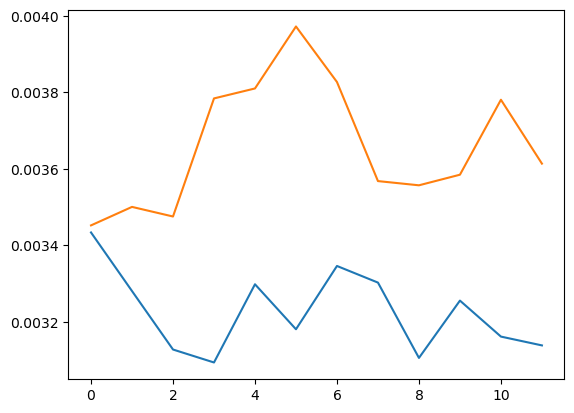

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

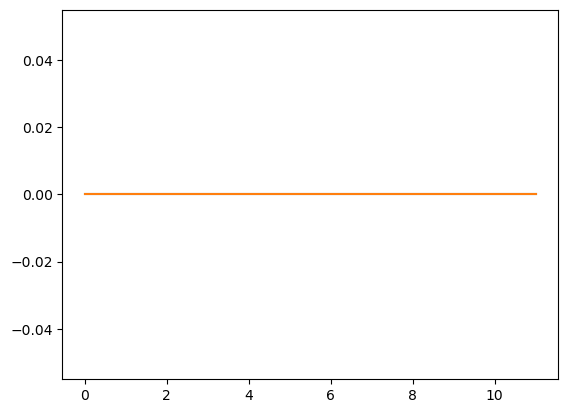

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])